In [67]:
import tensorflow as tf
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats


In [60]:
dfRaw = pd.read_csv('high_diamond_ranked_10min.csv')
dfRaw = dfRaw.iloc[:, 1:]

In [61]:
dfRaw.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Text(0.5, 1.0, 'Correlation between variables')

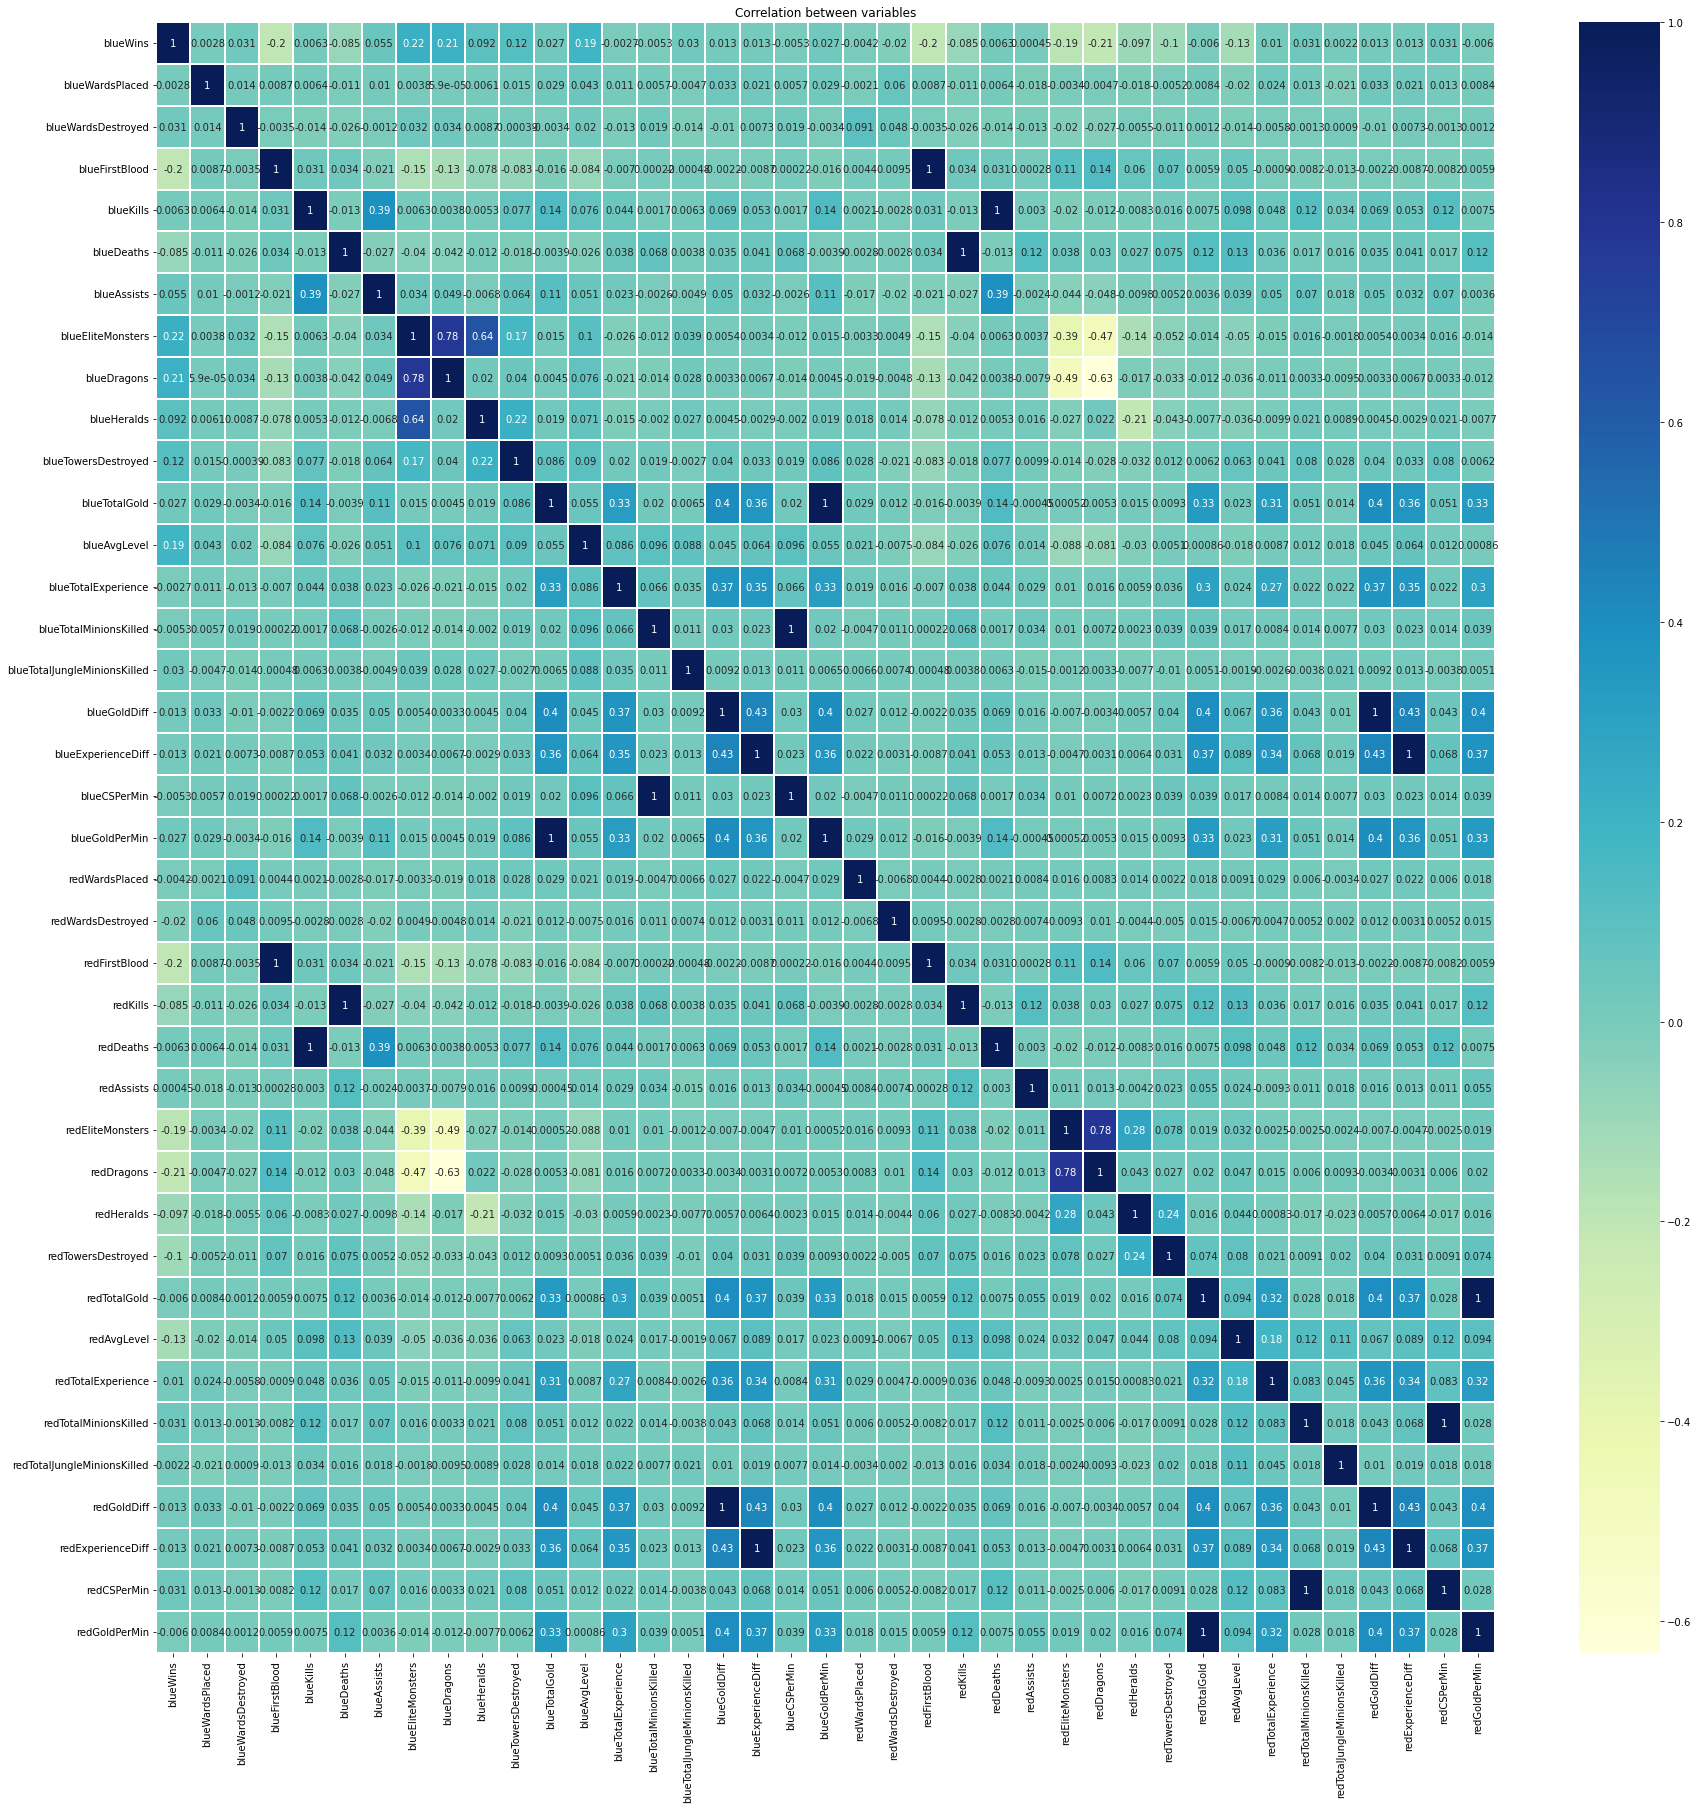

In [62]:
#calculate the coorelation 
rawCorr = dfRaw.apply(lambda x: pd.factorize(x)[0])
correlation = rawCorr.corr()

plt.figure(figsize=(30,30))
ax = sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, 
                 linewidths=0.1, cmap="YlGnBu",annot=True)
plt.title("Correlation between variables")

 

## Data explore

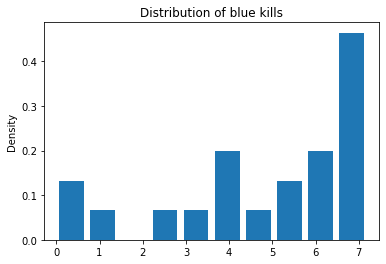

In [63]:
#distribution
blueKillDistribution = np.log(dfRaw['blueKills'].value_counts().values)
plt.hist(blueKillDistribution, density=True, rwidth=0.8)
plt.title('Distribution of blue kills')
plt.ylabel('Density')
plt.show()
 

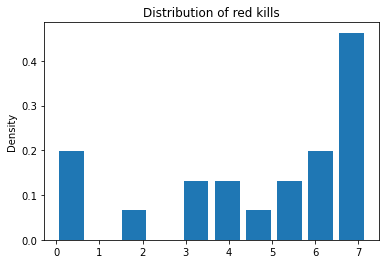

In [64]:
redKillDistribution = np.log(dfRaw['redKills'].value_counts().values)
plt.hist(redKillDistribution, density=True, rwidth=0.8)
plt.title('Distribution of red kills')
plt.ylabel('Density')
plt.show()

Text(0, 0.5, 'money per min')

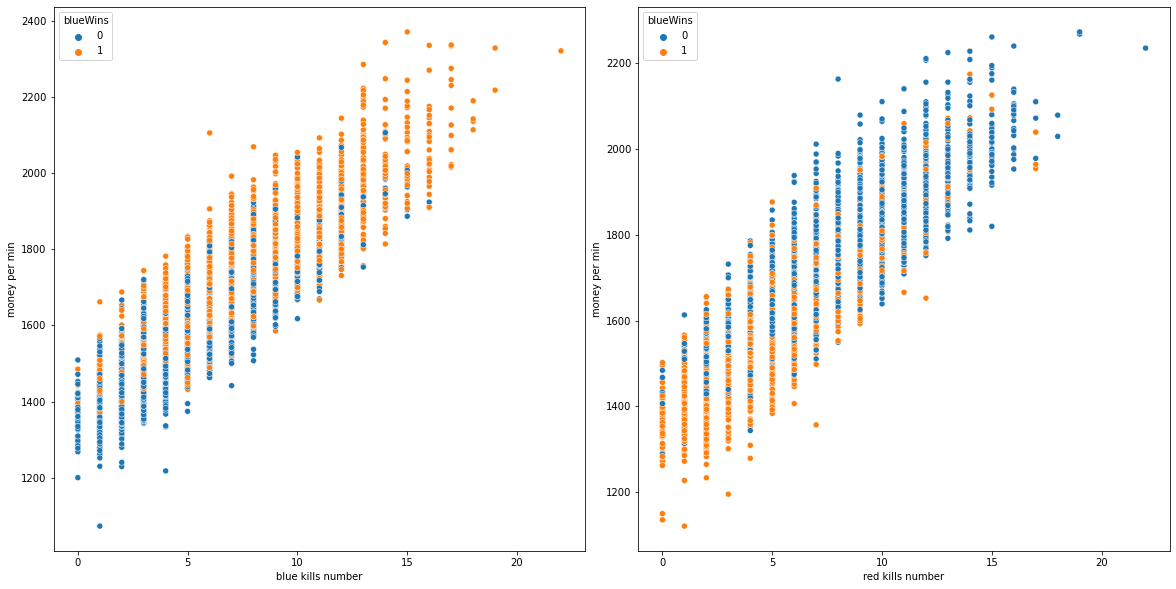

In [94]:
#money_per_kill = dfRaw.groupby('blueGoldPerMin').agg({'blueGoldPerMin':'mean','blueKills':'mean'})
#money_per_kill_red = dfRaw.groupby('redGoldPerMin').agg({'redGoldPerMin':'mean','redKills':'mean'})

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
fig.subplots_adjust(wspace=0.1)

sns.scatterplot(x='blueKills', y='blueGoldPerMin', hue = 'blueWins', data=dfRaw, ax=axes[0])
axes[0].set_xlabel('blue kills number')
axes[0].set_ylabel('money per min')


sns.scatterplot(x='redKills', y='redGoldPerMin', hue = 'blueWins',data = dfRaw, ax=axes[1])
axes[1].set_xlabel('red kills number')
axes[1].set_ylabel('money per min')
 
 